# Explicación del proyecto

Para la elaboración de este proyecto de análisis de datos utilizaremos dos conjuntos de datos `results.csv` y `goalscorers.csv`. Cada uno nos servirá para responder distintas preguntas que nos ayudarán a guiar nuestro análisis.

### `results.csv`

Este conjunto de datos tiene información de los ganadores de cada partido.
- *date*: Fecha del partido
- *home_team*: Equipo de casa
- *away_team*: Equipo de visitante
- *home_score*: Goles del equipo de casa
- *away_score*: Goles del equipo de visitante
- *tournament*: Nombre del torneo
- *city*: Ciudad donde el partido se jugó
- *country*: País donde se jugó el partido
- *neutral*: Si el partido se jugo en un lugar neutral o no

Usaremos este conjunto de datos para responder las siguientes preguntas:
1. **Tendencias históricas**:
  - ¿Cómo ha evolucionado el número de partidos jugados por año?
  - ¿Existen diferencias significativas en los resultados entre sedes neutrales y no neutrales?
2. **Resultados de partidos**:
  - ¿Cuál es la distribución de las diferencias de goles en los partidos?
  - ¿Qué equipos tienen más victorias jugando como locales o visitantes?
  - ¿Qué países albergan la mayor cantidad de partidos?


### `goalscorers.csv`

Este conjunto de datos tiene información sobre los jugadores que anotaron goles en partidos internacionales junto a los minutos en los que metieron esos goles. El conjunto cuenta con las siguientes columnas:
- *date*: Fecha del partido
- *home_team*: Equipo de casa
- *away_team*: Equipo de visitante
- *team*: Equipo que anotó el gol
- *scorer*: Jugador que anotó el gol
- *minute*: Minuto en el que se anotó el gol
- *own_goal*: El gol fue autogol
- *penalty*: Si el gol fue desde un penal

Usaremos este conjunto de datos para responder las siguientes preguntas:
1. **Patrones de anotación**:
  - ¿En qué minuto se marcan más goles?
  - ¿Cuáles son los jugadoes con más goles en el conjunto de datos?
2. **Comparación por equipos**:
  - ¿Cantidad de partidos ganados perdidos jugando en casa y de visitante?

#### Análisis de ambos conjuntos



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
results_data = pd.read_csv('/content/sample_data/results.csv')
results_data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [ ]:
results_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47917 entries, 0 to 47916
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        47917 non-null  object
 1   home_team   47917 non-null  object
 2   away_team   47917 non-null  object
 3   home_score  47917 non-null  int64 
 4   away_score  47917 non-null  int64 
 5   tournament  47917 non-null  object
 6   city        47917 non-null  object
 7   country     47917 non-null  object
 8   neutral     47917 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 3.0+ MB


In [ ]:
results_data.describe()

,home_score,away_score
count,47917.000000,47917.000000
mean,1.757873,1.181752
std,1.772538,1.399573
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [ ]:
# Partido en el que se metió más goles
results_data[results_data['home_score'] == results_data['home_score'].max()]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,result
25393,2001-04-11,Australia,American Samoa,31,0,FIFA World Cup qualification,Coffs Harbour,Australia,False,2001,Ganado


In [ ]:
# Partido en el que se metió más goles
results_data[results_data['away_score'] == results_data['away_score'].max()]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
29013,2005-03-11,Guam,North Korea,0,21,EAFF Championship,Taipei,Taiwan,True


In [ ]:
# Partidos en donde se metieron más goles en casa
results_data.sort_values(by='home_score', ascending=False).head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
25393,2001-04-11,Australia,American Samoa,31,0,FIFA World Cup qualification,Coffs Harbour,Australia,False
8517,1971-09-13,Tahiti,Cook Islands,30,0,South Pacific Games,Papeete,French Polynesia,False
11880,1979-08-30,Fiji,Kiribati,24,0,South Pacific Games,Nausori,Fiji,False
25390,2001-04-09,Australia,Tonga,22,0,FIFA World Cup qualification,Coffs Harbour,Australia,False
30486,2006-11-24,Sápmi,Monaco,21,1,Viva World Cup,Hyères,France,True
6545,1966-04-03,Libya,Oman,21,0,Arab Cup,Baghdad,Iraq,True
21924,1997-05-13,Kazakhstan,Guam,20,1,East Asian Games,Busan,South Korea,True
24150,2000-02-14,Kuwait,Bhutan,20,0,AFC Asian Cup qualification,Kuwait City,Kuwait,False
27304,2003-06-29,Gibraltar,Sark,19,0,Island Games,Saint Martin,Guernsey,True
24063,2000-01-26,China PR,Guam,19,0,AFC Asian Cup qualification,Hanoi,Vietnam,True


In [ ]:
# Partidos en donde se metieron más goles en visitante
results_data.sort_values(by='away_score', ascending=False).head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
29013,2005-03-11,Guam,North Korea,0,21,EAFF Championship,Taipei,Taiwan,True
15889,1987-12-15,American Samoa,Papua New Guinea,0,20,South Pacific Games,Nouméa,New Caledonia,True
37730,2014-06-01,Darfur,Padania,0,20,CONIFA World Football Cup,Östersund,Sweden,True
27314,2003-06-30,Sark,Isle of Wight,0,20,Island Games,Saint Martin,Guernsey,True
37735,2014-06-02,Darfur,South Ossetia,0,19,CONIFA World Football Cup,Östersund,Sweden,True
13775,1983-08-22,Niue,Papua New Guinea,0,19,South Pacific Games,Apia,Western Samoa,True
27376,2003-07-07,Kiribati,Vanuatu,0,18,South Pacific Games,Lautoka,Fiji,True
17925,1991-09-15,Guam,New Caledonia,0,18,South Pacific Games,Lae,Papua New Guinea,True
35858,2012-06-05,Darfur,Provence,0,18,Viva World Cup,Erbil,Iraq,True
5866,1963-09-06,Solomon Islands,Tahiti,0,18,South Pacific Games,Suva,Fiji,True


In [ ]:
# Número de partidos juagos por año
results_data['year'] = pd.to_datetime(results_data['date']).dt.year
partidos_por_año = results_data.groupby('year').size()
partidos_por_año.tail(30)

,0
year,
1995,668
1996,837
1997,907
1998,761
1999,778
2000,1040
2001,1031
2002,768
2003,947


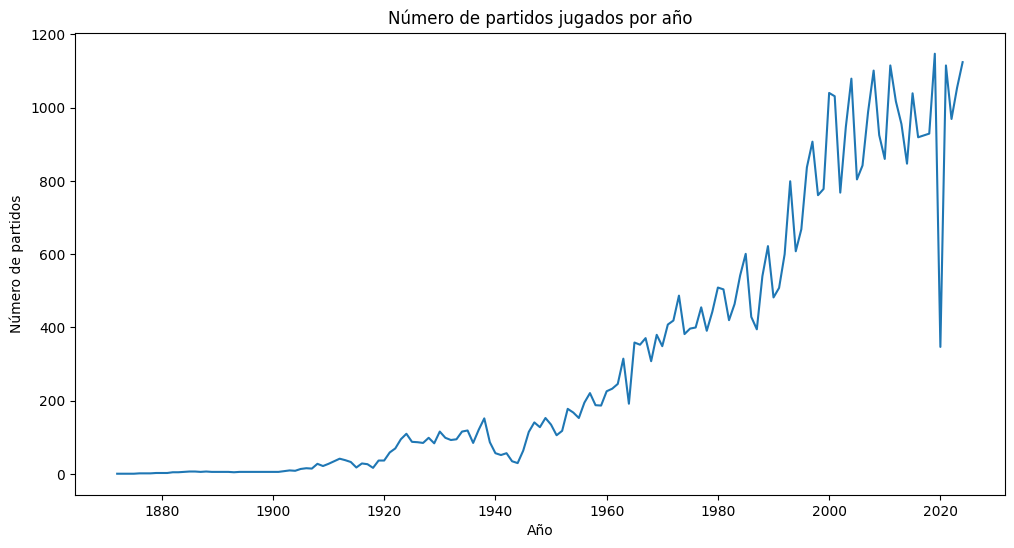

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x=partidos_por_año.index, y=partidos_por_año.values)
plt.title('Número de partidos jugados por año')
plt.xlabel('Año')
plt.ylabel('Número de partidos')
plt.show()

In [ ]:
goles_casa_por_agno = results_data.groupby('year')['home_score'].sum()
goles_visitante_por_agno = results_data.groupby('year')['away_score'].sum()

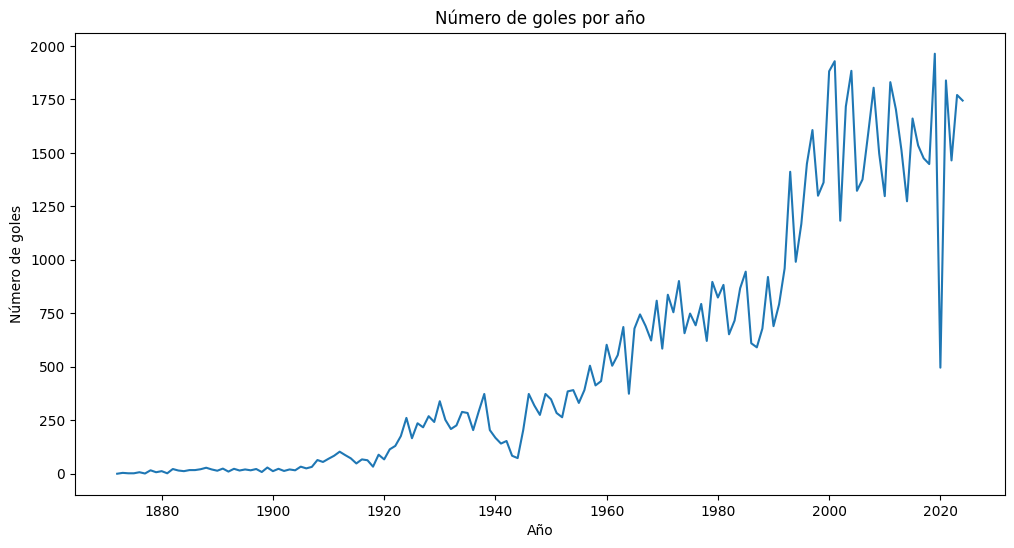

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x=goles_casa_por_agno.index, y=goles_casa_por_agno.values)
plt.title('Número de goles por año')
plt.xlabel('Año')
plt.ylabel('Número de goles')
plt.show()

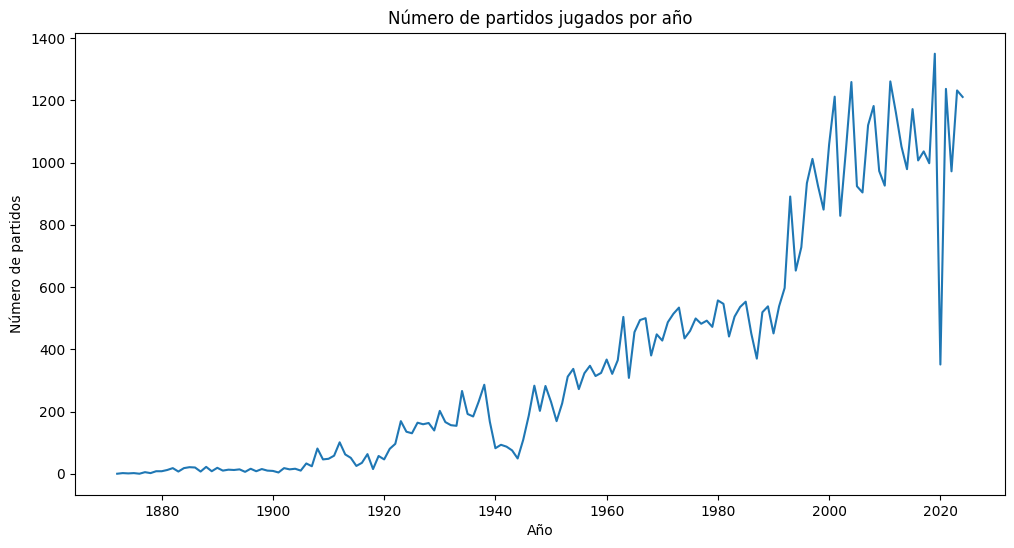

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x=goles_visitante_por_agno.index, y=goles_visitante_por_agno.values)
plt.title('Número de partidos jugados por año')
plt.xlabel('Año')
plt.ylabel('Número de partidos')
plt.show()

In [ ]:
results_data['result'] = results_data.apply(lambda x: 'Ganado' if x['home_score'] > x['away_score']
                                            else 'Empate' if x['home_score'] == x['away_score']
                                            else 'Perdedor', axis=1)
results_data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,result
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,Empate
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,Ganado
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,Ganado
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,Empate
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,Ganado


In [ ]:
results_data.value_counts('neutral')

,count
neutral,
False,35309
True,12608


In [ ]:
resultados_neutral = results_data.groupby(['neutral', 'result']).size().unstack()
resultados_neutral

result,Empate,Ganado,Perdedor
neutral,,,
False,8080,17908,9321
True,2822,5576,4210


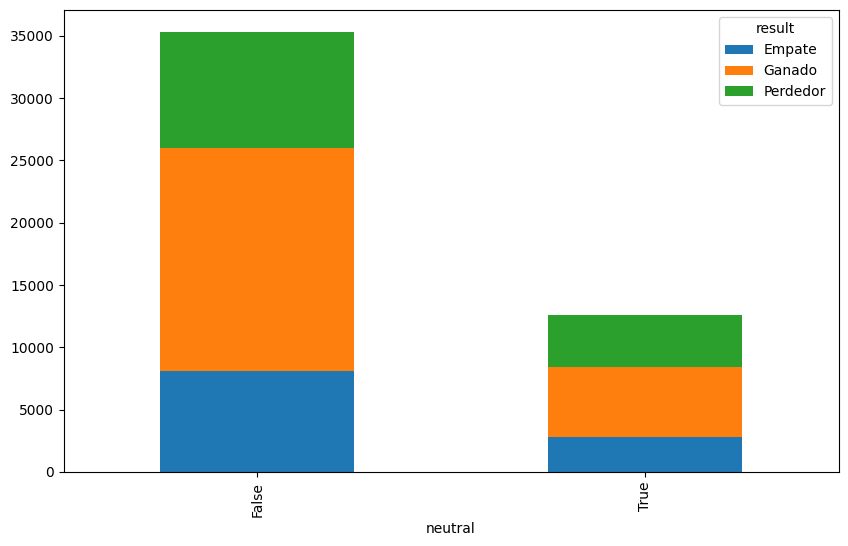

In [ ]:
resultados_neutral.plot(kind='bar', stacked=True, figsize=(10,6))
plt.show()

In [ ]:
results_data['result'].value_counts()

,count
result,
Ganado,23484
Perdedor,13531
Empate,10902


In [ ]:
ganadores_casa = results_data.groupby(['home_team', 'result']).size().unstack()
ganadores_casa

result,Empate,Ganado,Perdedor
home_team,,,
Abkhazia,8.0,11.0,3.0
Afghanistan,11.0,18.0,17.0
Albania,47.0,75.0,81.0
Alderney,1.0,1.0,46.0
Algeria,82.0,193.0,61.0
...,...,...,...
Yugoslavia,37.0,108.0,45.0
Zambia,94.0,182.0,53.0
Zanzibar,10.0,17.0,31.0


<ipython-input-32-d6e7cadad0b0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_ganadores_casa.index, y=top_ganadores_casa['Ganado'], palette='mako')


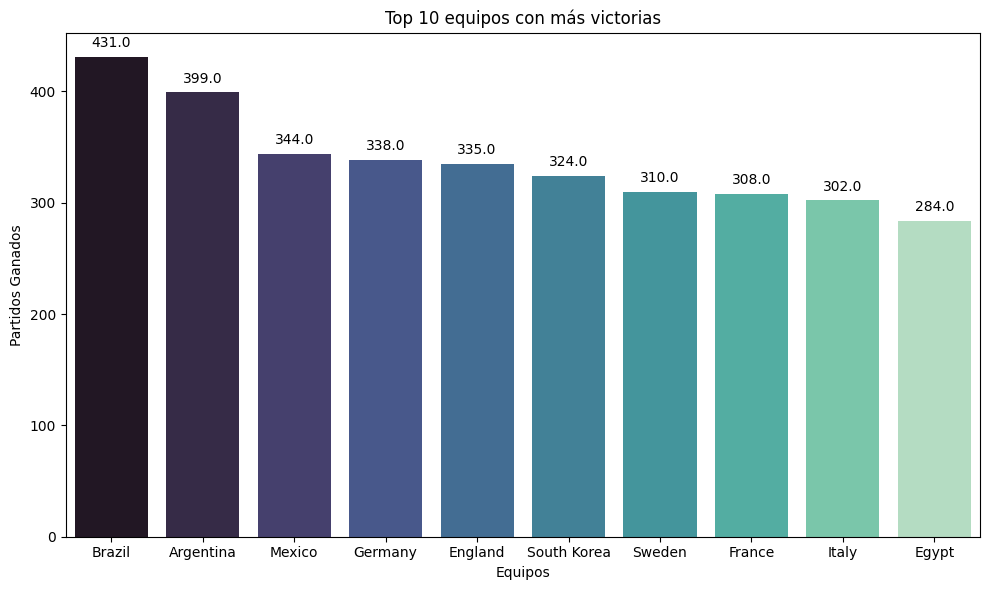

In [ ]:
top_ganadores_casa = ganadores_casa.sort_values(by='Ganado', ascending=False).head(10)
plt.figure(figsize=(10,6))
ax = sns.barplot(x=top_ganadores_casa.index, y=top_ganadores_casa['Ganado'], palette='mako')
plt.xlabel('Equipos')
plt.ylabel('Partidos Ganados')
plt.title('Top 10 equipos con más victorias')
plt.tight_layout()
for p in ax.patches:
  ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
              ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

In [ ]:
ganadores_casa.sort_values(by='Empate', ascending=False).head(10)

result,Empate,Ganado,Perdedor
home_team,,,
Mexico,132.0,344.0,108.0
South Korea,127.0,324.0,94.0
Italy,126.0,302.0,54.0
Argentina,126.0,399.0,70.0
England,118.0,335.0,87.0
Germany,115.0,338.0,92.0
Brazil,114.0,431.0,60.0
Hungary,109.0,275.0,105.0
Malaysia,108.0,234.0,122.0


In [ ]:
ganadores_casa.sort_values(by='Perdedor', ascending=False).head(10)

result,Empate,Ganado,Perdedor
home_team,,,
Luxembourg,40.0,31.0,177.0
Finland,71.0,116.0,168.0
Malta,51.0,46.0,151.0
Northern Ireland,73.0,113.0,147.0
Norway,104.0,179.0,144.0
Switzerland,102.0,196.0,142.0
Austria,87.0,229.0,136.0
Singapore,76.0,147.0,136.0
Indonesia,85.0,207.0,130.0


In [ ]:
goalscorers_data = pd.read_csv('/content/sample_data/goalscorers.csv')
goalscorers_data.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False


In [ ]:
goalscorers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44362 entries, 0 to 44361
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       44362 non-null  object 
 1   home_team  44362 non-null  object 
 2   away_team  44362 non-null  object 
 3   team       44362 non-null  object 
 4   scorer     44313 non-null  object 
 5   minute     44103 non-null  float64
 6   own_goal   44362 non-null  bool   
 7   penalty    44362 non-null  bool   
dtypes: bool(2), float64(1), object(5)
memory usage: 2.1+ MB


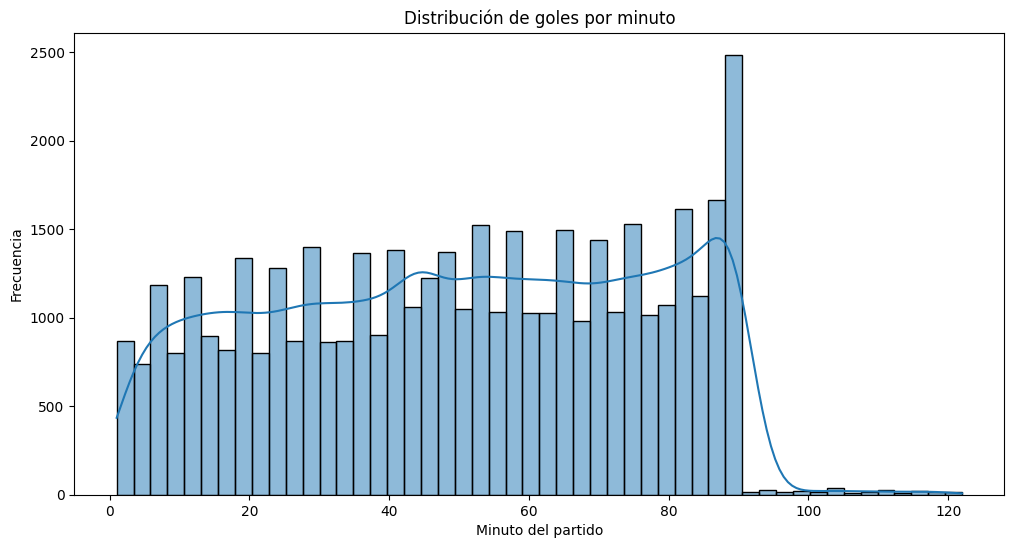

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(goalscorers_data['minute'], kde=True, bins=50)
plt.title('Distribución de goles por minuto')
plt.xlabel('Minuto del partido')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
# Identificamos la barra con la mayor frecuencia
filtered_minutes = goalscorers_data['minute'].dropna()
counts, bins = np.histogram(filtered_minutes, bins=50)

max_bin_index=np.argmax(counts)
min_range = bins[max_bin_index]
max_range = bins[max_bin_index+1]

print(f"El rango de minutos con mayor frecuencia de goles es {min_range:.2f} a {max_range:.2f}")

El rango de minutos con mayor frecuencia de goles es 88.12 a 90.54


In [ ]:
counts[max_bin_index] # Valor de esa barra

2486

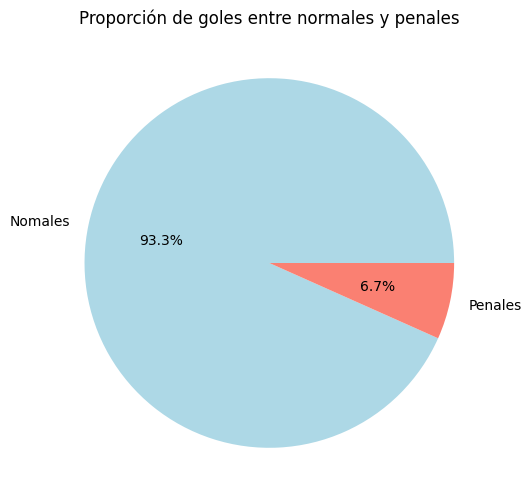

In [ ]:
penalty_counts = goalscorers_data['penalty'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(penalty_counts, labels=['Nomales', 'Penales'], autopct='%1.1f%%', colors=['lightblue', 'salmon'])
plt.title('Proporción de goles entre normales y penales')
plt.show()

In [ ]:
goalscorers_data['scorer'].value_counts().head(10)

,count
scorer,
Cristiano Ronaldo,108
Robert Lewandowski,63
Romelu Lukaku,60
Harry Kane,58
Lionel Messi,55
Edin Džeko,50
Ali Daei,49
Miroslav Klose,48
Aleksandar Mitrović,47
